# Introducción a PyTorch - Tensors

In [1]:
import torch 
import numpy as np

In [2]:
from matplotlib import pyplot as plt

## Documentación

In [ ]:
torch.  # <Tab> para obtener lista de opciones

: 

In [3]:
torch.nn.Module() # <Shift>+<Tab> para una breve descripción del módulo

Module()

In [4]:
# Ver toda las opciones con `*Tensor`?
# <esc> para salir
torch.*Tensor?

In [6]:
# torch.nn.Module?
torch.nn.Module??

## Tensors

De la documentación de pytorch:

``Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see Bridge with NumPy). Tensors are also optimized for automatic differentiation (we’ll see more about that later in the Autograd section)``

### Inicialización

In [8]:
# Desde datos. Pueden indicar el tipo
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
# x_data = torch.tensor([[1, 2],[3, 4]])

In [9]:
# Desde un array de numpy
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [10]:
# Desde otro tensor
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4159, 0.5577],
        [0.8716, 0.0494]]) 



#### Constructors

In [11]:
# Create tensor from 3 to 8, with each having a space of 1
torch.arange(3., 8 + 1)

tensor([3., 4., 5., 6., 7., 8.])

In [12]:
# Create tensor from 5.7 to -2.1 with each having a space of -3
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [13]:
# returns a 1D tensor of steps equally spaced points between start=3, end=8 and steps=20
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [15]:
# Create a tensor filled with 0's
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [16]:
# Create a tensor filled with 1's
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [17]:
# Create a tensor with the diagonal filled with 1
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

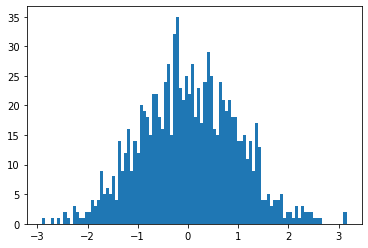

In [20]:
# Numpy bridge
plt.hist(torch.randn(1000).numpy(), 100);

### Atributos

In [21]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [22]:
type(tensor)

torch.Tensor

In [23]:
print(f'point in a {tensor.numel()} dimensional space')
print(f'organised in {tensor.dim()} sub-dimensions')

point in a 12 dimensional space
organised in 2 sub-dimensions


### Operaciones

In [24]:
tensor = torch.ones(4, 4)
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [25]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


#### Vectores

In [26]:
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [27]:
print(f'dim: {v.dim()}, size: {v.size()[0]}')

dim: 1, size: 4


In [28]:
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [29]:
# Element-wise multiplication
# Equivalente a v.mul(w)
v * w

tensor([1., 0., 6., 0.])

In [30]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
# Equivalente a v.matmul(w)
v @ w

tensor(7.)

In [31]:
# In-place replacement of random number from 0 to 10
# Complejo para autograd --> no recomendable
x = torch.Tensor(5).random_(10)
x

tensor([8., 4., 1., 0., 3.])

In [32]:
# Square all elements in the tensor
print(v.pow(2), v)

tensor([ 1.,  4.,  9., 16.]) tensor([1., 2., 3., 4.])


#### Matrices

In [8]:
# Create a 2x4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [34]:
m.dim()

2

In [35]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [36]:
# Indexes row 0, all columns (returns 1x4)
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [37]:
# Indexes row 0, all columns (returns size 4)
m[0, :]

tensor([2., 5., 3., 7.])

In [38]:
v = torch.arange(1., 4 + 1)
v

tensor([1., 2., 3., 4.])

In [39]:
# Scalar product
m @ v

tensor([49., 47.])

In [11]:
m.t_()

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [12]:
m

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [41]:
tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [43]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [44]:
# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [45]:
z3

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [46]:
# Elementos simples
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [47]:
# In place
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


### Conexión con Numpy

In [48]:
# De tensor a numpy

t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [49]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [50]:
# De numpy a tensor

n = np.ones(5)
t = torch.from_numpy(n)

In [51]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


### Casting

In [52]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [53]:
# This is basically a 64 bit float tensor
m_double = m.double()
m_double

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [54]:
# This creates a tensor of type int8
m_byte = m.byte()
m_byte

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [55]:
# Move your tensor to GPU device 0 if there is one (first GPU in the system)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device)

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], device='cuda:0')

### Almacenamiento

In [56]:
points = torch.ones(3, 4)

In [58]:
# Alternativa 1 : No es ideal porque no es compatible con otros módulos de python
torch.save(points, 'points.t')

In [59]:
# Alternativa 2
with open('points.t','wb') as f:
   torch.save(points, f)

In [60]:
points = torch.load('points.t')

In [61]:
points

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [62]:
# HDF 
import h5py

In [63]:
f = h5py.File('points.hdf5', 'w')
dset = f.create_dataset('coords', data=points.numpy())
f.close()

In [67]:
f = h5py.File('points.hdf5', 'r')
dset = f['coords']
last_points = dset[-2:]

In [68]:
last_points

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

In [69]:
type(last_points)

numpy.ndarray

In [70]:
last_points = torch.from_numpy(dset[-2:])
f.close()